## Importing Dependencies

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)
plt.rcParams['figure.figsize']=(12,7)

### Reading Dataset

In [283]:
df_company=pd.read_csv('companies.csv')
df_company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


## Cleaning

### Looking into Dataset

In [284]:
df_company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [285]:
df_company.isna().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

### There are many columns which is not usable and repetitive so we can drop them

,'first_investment_at','last_investment_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at'

In [286]:
df_company=df_company.drop(df_company.columns[:8],axis=1)

df_company=df_company.drop(['domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width','region',
       'logo_height', 'short_description', 'description', 'overview','tag_list', 'state_code', 'city',
       'created_by','created_at', 'updated_at'],axis=1)

In [287]:
print(f"No. of Raws in Dataset are: {df_company.shape[0] }\n\nNo.of Columns in Dataset are: {df_company.shape[1]}")

No. of Raws in Dataset are: 196553

No.of Columns in Dataset are: 20


In [288]:
df_company[df_company.duplicated()]

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
79,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
114,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
132,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196533,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196534,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196535,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196536,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
df_company=df_company.drop_duplicates()

In [290]:
print(f"No. of Raws in Dataset are: {df_company.shape[0] }\n\nNo.of Columns in Dataset are: {df_company.shape[1]}")

No. of Raws in Dataset are: 109464

No.of Columns in Dataset are: 20


### Getting Null Values of Dataset

In [291]:
print(f"Percentage of Null Values in Dataset are as follow \n\n{df_company.isna().mean()*100}")

Percentage of Null Values in Dataset are as follow 

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
invested_companies     97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64


### Droping Columns Having Highest Null Values(more than 97%)

In [292]:
df_company=df_company.drop(['investment_rounds','invested_companies','ROI'],axis=1)

In [293]:
print(f"No. of Raws in Dataset are: {df_company.shape[0] }\n\nNo.of Columns in Dataset are: {df_company.shape[1]}")

No. of Raws in Dataset are: 109464

No.of Columns in Dataset are: 17


In [294]:
df_company=df_company.drop(['first_investment_at','last_investment_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at'],axis=1)

### Droping  Raws Having Null values in 'category_code', 'status', 'country_code'& 'founded_at'

In [295]:
df_company=df_company.dropna(subset=['category_code','status','country_code','founded_at'])

In [296]:
print(f"No. of Raws in Dataset are: {df_company.shape[0] }\n\nNo.of Columns in Dataset are: {df_company.shape[1]}")

No. of Raws in Dataset are: 63585

No.of Columns in Dataset are: 11


### Checking For Outlier

In [297]:
df_company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'lat', 'lng'],
      dtype='object')

#### For funding total usd

(63585, 11)


<AxesSubplot:ylabel='funding_total_usd'>

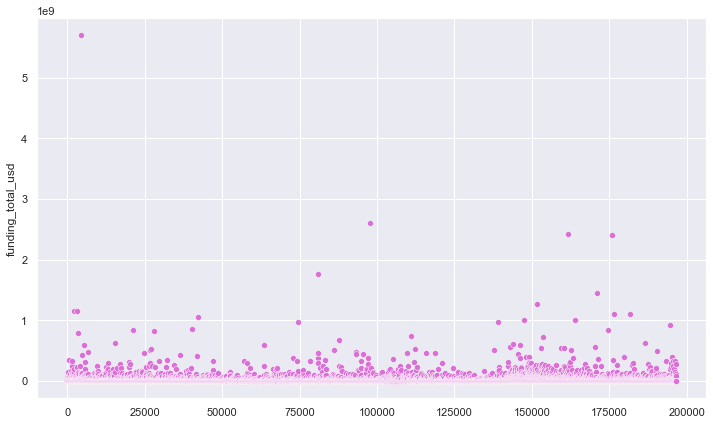

In [298]:
print(df_company.shape)
sns.scatterplot(x=df_company['funding_total_usd'].index,y=df_company['funding_total_usd'],color='orchid')

In [299]:
#detecting & drpoing Outlier with iqr Method
Q1_usd = df_company.funding_total_usd.quantile(0.25)
Q3_usd =df_company.funding_total_usd.quantile(0.75)
print(f'Quartile 1 for funding usd is: {Q1_usd}\n\nQuartile 3 for funding usd is: {Q3_usd}\n')
IQR_usd = Q3_usd - Q1_usd
print(f'Inter Quartile range for funding usd is: {IQR_usd}\n')


lower_limit_usd = Q1_usd - 1.5*IQR_usd
upper_limit_usd = Q3_usd + 1.5*IQR_usd
print(f'Lower limit for funding usd is: {lower_limit_usd}\n\nHigher limit for funding usd is: {upper_limit_usd}\n')


outlier_usd=df_company[(df_company.funding_total_usd<lower_limit_usd)|(df_company.funding_total_usd>upper_limit_usd)]
print("\n\noutlier in fundiding total usd")
outlier_usd

Quartile 1 for funding usd is: 511038.0

Quartile 3 for funding usd is: 12000000.0

Inter Quartile range for funding usd is: 11488962.0

Lower limit for funding usd is: -16722405.0

Higher limit for funding usd is: 29233443.0



outlier in fundiding total usd


,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
19,health,operating,2007-10-01,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415
24,analytics,operating,2006-01-01,NaN,USA,3.0,33000000.0,3.0,19.0,37.774929,-122.419415
66,mobile,acquired,2005-01-01,NaN,USA,7.0,121500000.0,3.0,45.0,42.360082,-71.058880
80,games_video,operating,2003-04-01,NaN,USA,3.0,95097200.0,3.0,28.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...
196290,mobile,operating,2001-01-01,NaN,DEU,5.0,40673570.0,1.0,11.0,48.027728,11.586918
196298,hardware,operating,1995-01-01,NaN,USA,3.0,146000000.0,3.0,23.0,37.485215,-122.236355
196415,security,operating,1997-01-01,NaN,USA,1.0,108000000.0,3.0,17.0,39.920541,-105.086650
196496,games_video,acquired,2004-01-01,NaN,CHN,4.0,286500000.0,2.0,3.0,31.230390,121.473702


In [300]:
filter1=df_company['funding_total_usd']>upper_limit_usd
filter2=df_company['funding_total_usd']<lower_limit_usd

df_company.drop(df_company[filter1 | filter2].index,inplace=True)
df_company.shape

(61024, 11)

<AxesSubplot:ylabel='funding_total_usd'>

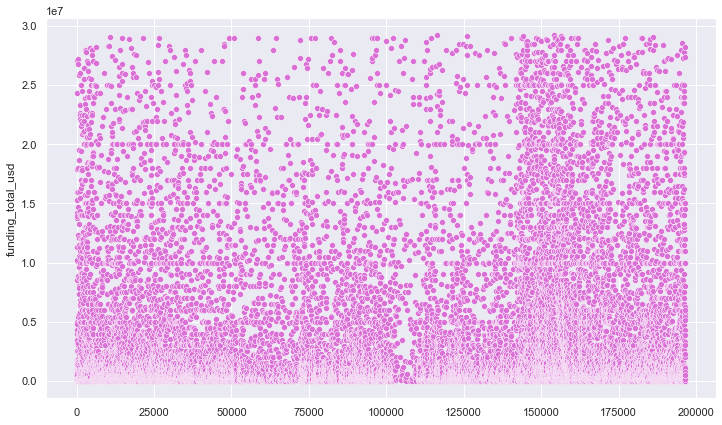

In [301]:
sns.scatterplot(x=df_company['funding_total_usd'].index,y=df_company['funding_total_usd'],color='orchid')

#### For Funding Rounds

<AxesSubplot:xlabel='funding_rounds', ylabel='Count'>

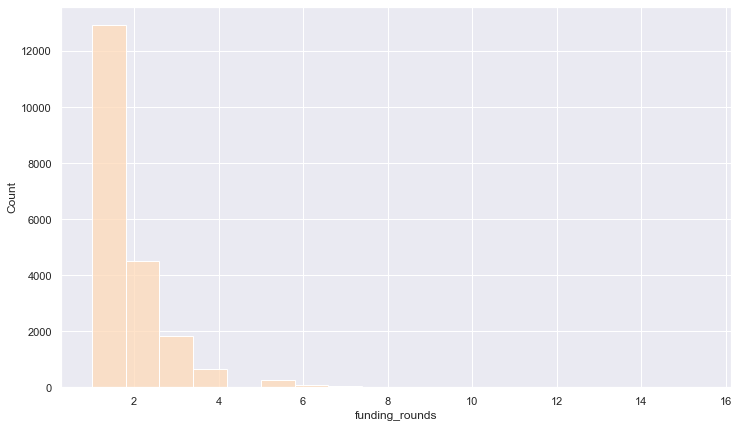

In [302]:
sns.histplot(x=df_company['funding_rounds'],binwidth=0.8,color='peachpuff')

In [303]:
#detecting & drpoing Outlier with iqr Method
Q1_round = df_company.funding_rounds.quantile(0.25)
Q3_round =df_company.funding_rounds.quantile(0.75)
print(f'Quartile 1 for funding usd is: {Q1_round}\n\nQuartile 3 for funding usd is: {Q3_round}\n')
IQR_round = Q3_round - Q1_round
print(f'Inter Quartile range for funding usd is: {IQR_round}\n')


lower_limit_round = Q1_round - 1.5*IQR_round
upper_limit_round = Q3_round + 1.5*IQR_round
print(f'Lower limit for funding usd is: {lower_limit_round}\n\nHigher limit for funding usd is: {upper_limit_round}\n')


outlier_round=df_company[(df_company.funding_rounds<lower_limit_round)|(df_company.funding_rounds>upper_limit_round)]
print("\n\nOutlier in funding round")
outlier_round

Quartile 1 for funding usd is: 1.0

Quartile 3 for funding usd is: 2.0

Inter Quartile range for funding usd is: 1.0

Lower limit for funding usd is: -0.5

Higher limit for funding usd is: 3.5



Outlier in funding round


,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
298,software,acquired,2002-01-01,NaN,USA,5.0,13900000.0,3.0,5.0,47.606209,-122.332071
448,software,operating,2002-02-01,NaN,USA,4.0,14734000.0,1.0,8.0,32.814018,-96.948894
485,games_video,operating,2007-03-01,NaN,USA,4.0,18000000.0,2.0,16.0,37.562992,-122.325525
505,finance,operating,2011-05-11,NaN,USA,5.0,5395000.0,1.0,4.0,39.103118,-84.512020
571,public_relations,operating,2007-09-01,NaN,USA,4.0,1682618.0,1.0,7.0,38.402136,-122.823881
...,...,...,...,...,...,...,...,...,...,...,...
196256,software,operating,2006-01-01,NaN,USA,4.0,13269616.0,1.0,13.0,38.252665,-85.758456
196289,mobile,operating,2004-01-01,NaN,USA,4.0,27750000.0,NaN,NaN,42.633425,-71.316172
196293,security,acquired,1999-01-01,NaN,USA,4.0,24500000.0,2.0,2.0,43.071755,-70.762553
196356,travel,operating,2010-01-01,NaN,USA,4.0,3265000.0,4.0,9.0,39.739236,-104.990251


In [304]:
# For funding_rounds
filter1=df_company['funding_rounds']>upper_limit_round
filter2=df_company['funding_rounds']<lower_limit_round

df_company.drop(df_company[filter1 | filter2].index,inplace=True)
df_company.shape

(59987, 11)

<AxesSubplot:xlabel='funding_rounds', ylabel='Count'>

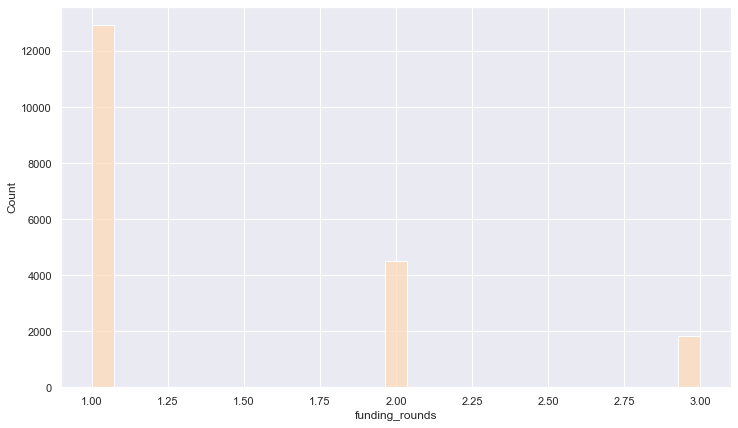

In [305]:
sns.histplot(x=df_company['funding_rounds'],color='peachpuff')

#### For Relationship

<AxesSubplot:xlabel='relationships', ylabel='Density'>

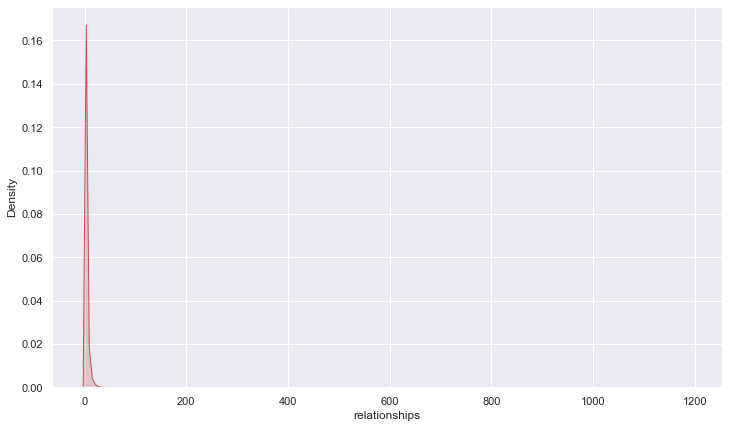

In [306]:
sns.kdeplot(x=df_company['relationships'],fill=True,color='r')

In [307]:
#detecting & drpoing Outlier with iqr Method
Q1_relationship  = df_company.relationships.quantile(0.25)
Q3_relationship =df_company.relationships.quantile(0.75)
print(f'Quartile 1 for relationship is: {Q1_relationship}\n\nQuartile 3 for relationship is: {Q3_relationship}\n')
IQR_relationship = Q3_relationship - Q1_relationship
print(f'Inter Quartile range for relationship is: {IQR_relationship}\n')


lower_limit_relationship = Q1_relationship - 1.5*IQR_relationship
upper_limit_relationship = Q3_relationship + 1.5*IQR_relationship
print(f'Lower limit for relationship is: {lower_limit_relationship}\n\nLHigher limit for relationship is: {upper_limit_relationship}\n')


outlier_relationship=df_company[(df_company.relationships<lower_limit_relationship)|(df_company.relationships>upper_limit_relationship)]
print("\n\nOutlier in relationship")
outlier_relationship

Quartile 1 for relationship is: 1.0

Quartile 3 for relationship is: 4.0

Inter Quartile range for relationship is: 3.0

Lower limit for relationship is: -3.5

LHigher limit for relationship is: 8.5



Outlier in relationship


,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
18,mobile,acquired,2008-03-01,NaN,USA,1.0,NaN,4.0,9.0,37.441883,-122.143019
54,ecommerce,operating,2004-01-01,NaN,USA,1.0,NaN,1.0,9.0,47.610150,-122.201516
77,software,operating,1996-01-01,NaN,USA,2.0,840000.0,NaN,19.0,42.269522,-71.616129
83,mobile,operating,2007-10-01,NaN,USA,NaN,NaN,2.0,10.0,40.712775,-74.005973
...,...,...,...,...,...,...,...,...,...,...,...
196475,mobile,ipo,2001-01-01,NaN,USA,NaN,NaN,2.0,15.0,37.548270,-121.988572
196487,other,operating,1952-01-01,NaN,USA,NaN,NaN,1.0,27.0,47.751074,-120.740139
196519,enterprise,acquired,2003-01-01,NaN,USA,1.0,14500000.0,3.0,19.0,37.441883,-122.143019
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329


In [308]:
filter1=df_company['relationships']>upper_limit_relationship
filter2=df_company['relationships']<lower_limit_relationship

df_company.drop(df_company[filter1 | filter2].index,inplace=True)

<AxesSubplot:xlabel='relationships', ylabel='Density'>

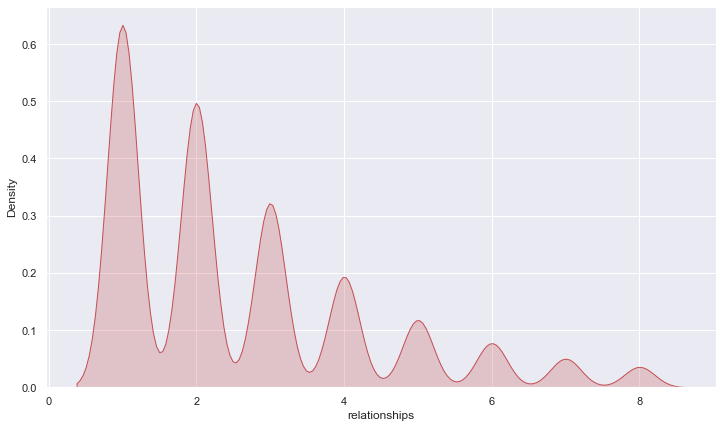

In [309]:
sns.kdeplot(x=df_company['relationships'],fill=True,color='r')

In [310]:
print(f"No. of Raws in Dataset are: {df_company.shape[0] }\n\nNo.of Columns in Dataset are: {df_company.shape[1]}")

No. of Raws in Dataset are: 56580

No.of Columns in Dataset are: 11


#### Checking Data Types

In [311]:
df_company.dtypes

category_code         object
status                object
founded_at            object
closed_at             object
country_code          object
funding_rounds       float64
funding_total_usd    float64
milestones           float64
relationships        float64
lat                  float64
lng                  float64
dtype: object

## Now Extrcating Year from Dates

### converting date objects to Date-time

In [312]:
df_company[['founded_at','closed_at']]=df_company[['founded_at','closed_at']].apply(pd.to_datetime)

In [313]:
df_company['founded_at']=df_company['founded_at'].dt.year
df_company['closed_at']=df_company['closed_at'].dt.year

In [314]:
df_company.head()

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
20,cleantech,operating,2003,NaN,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061


### Deleting Columns which are not needed now

In [315]:
df_company['closed_at'].unique()

array([  nan, 2010., 2012., 2013., 2009., 2011., 2008., 2006., 1963.,
       1991., 2005., 2001., 2007., 1998., 2004., 1997., 2000.])

### Creating New Feature for isClosed

#### Replacing 0 with 'Closed' & 'Acquired'  and 1 with 'Operating' & 'IPO'

In [316]:
df_company['isClosed']=np.where((df_company['status']=='operating') | (df_company['status']=='ipo'),1,0)

In [317]:
df_company['isClosed'].value_counts()

1    52169
0     4411
Name: isClosed, dtype: int64

In [318]:
df_company['closed_at']=np.where((df_company['status']=='operating')|(df_company['status']=='ipo')
                                 ,2021,df_company['closed_at'])
df_company.shape

(56580, 12)

In [319]:
df_company=df_company.dropna(subset=['closed_at'])
df_company.shape

(53660, 12)


### Getting Active Days Of Comapany

In [320]:
df_company.dtypes

category_code         object
status                object
founded_at             int64
closed_at            float64
country_code          object
funding_rounds       float64
funding_total_usd    float64
milestones           float64
relationships        float64
lat                  float64
lng                  float64
isClosed               int32
dtype: object

In [321]:
df_company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021.0,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,1
6,cleantech,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1
12,advertising,operating,2008,2021.0,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1
15,games_video,operating,2008,2021.0,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1
20,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1
...,...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,2008,2021.0,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373,1
196545,software,operating,2004,2021.0,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219,1
196548,ecommerce,operating,2007,2021.0,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,1
196551,search,operating,2008,2021.0,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,1


In [322]:
# closed_at=df_company['closed_at']
# founded_at=df_company['founded_at']

# active_days=[]
# zip_object=zip(closed_at,founded_at)


# for closed_at,founded_at in zip_object:
#     if float(closed_at)>float(founded_at):
#         days=365*(float(closed_at)-float(founded_at))
#         active_days.append(days)
    
#     else:
#         index_name=df_company[(df_company['founded_at']==founded_at) & (df_company['closed_at']==closed_at)].index
#         df_company.drop(index_name,inplace=True)

# df_company['ActiveDays']=pd.DataFrame(active_days)


In [323]:
closed_at=df_company['closed_at']
founded_at=df_company['founded_at']

active_days=365*((closed_at).astype('float64')-(founded_at).astype('float64'))
df_company['Active_Days']=active_days
index_name=df_company['Active_Days'].sort_values().head(68).index
df_company.drop(index_name,inplace=True)
df_company['Active_Days']

5         5110.0
6         4745.0
12        4745.0
15        4745.0
20        6570.0
           ...  
196543    4745.0
196545    6205.0
196548    5110.0
196551    4745.0
196552    5110.0
Name: Active_Days, Length: 53592, dtype: float64

In [324]:
# df_company=df_company.drop(['founded_at','closed_at'],axis=1)

In [325]:
df_company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days
5,advertising,operating,2007,2021.0,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,1,5110.0
6,cleantech,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,1,4745.0
12,advertising,operating,2008,2021.0,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,1,4745.0
15,games_video,operating,2008,2021.0,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,1,4745.0
20,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,2008,2021.0,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373,1,4745.0
196545,software,operating,2004,2021.0,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219,1,6205.0
196548,ecommerce,operating,2007,2021.0,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,1,5110.0
196551,search,operating,2008,2021.0,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,1,4745.0


## Dealing with Numerical Data

In [326]:
df_company.dtypes

category_code         object
status                object
founded_at             int64
closed_at            float64
country_code          object
funding_rounds       float64
funding_total_usd    float64
milestones           float64
relationships        float64
lat                  float64
lng                  float64
isClosed               int32
Active_Days          float64
dtype: object

In [327]:
df_company.isna().sum()

category_code            0
status                   0
founded_at               0
closed_at                0
country_code             0
funding_rounds       37519
funding_total_usd    39623
milestones           25966
relationships        14453
lat                   2182
lng                   2182
isClosed                 0
Active_Days              0
dtype: int64

### filling null values in relationships, funding_usd, funding_rounds, milestones,  lat, long

In [328]:

df_company['milestones'].fillna(round(df_company['milestones'].mean()),inplace=True)

df_company['funding_rounds'].fillna(round(df_company['funding_rounds'].mean()),inplace=True)

df_company['funding_total_usd'].fillna(round(df_company['funding_total_usd'].mean()),inplace=True)


In [329]:
df_company.isna().sum()

category_code            0
status                   0
founded_at               0
closed_at                0
country_code             0
funding_rounds           0
funding_total_usd        0
milestones               0
relationships        14453
lat                   2182
lng                   2182
isClosed                 0
Active_Days              0
dtype: int64

In [330]:
df_company.shape

(53592, 13)

In [331]:
df_company.dropna(inplace=True)

In [332]:
df_company.reset_index(inplace=True,drop=True)

In [333]:
df_company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClosed,Active_Days
0,advertising,operating,2007,2021.0,MAR,1.0,3652913.0,1.0,2.0,30.427755,-9.598107,1,5110.0
1,advertising,operating,2008,2021.0,USA,1.0,3652913.0,1.0,2.0,35.686975,-105.937799,1,4745.0
2,games_video,operating,2008,2021.0,USA,1.0,3652913.0,1.0,3.0,33.078655,-116.601964,1,4745.0
3,cleantech,operating,2003,2021.0,USA,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,1,6570.0
4,software,operating,2011,2021.0,AUS,1.0,3652913.0,1.0,2.0,49.050438,-122.304470,1,3650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37735,games_video,closed,2006,2012.0,USA,2.0,1100000.0,2.0,4.0,37.774929,-122.419415,0,2190.0
37736,security,operating,2008,2021.0,USA,1.0,3652913.0,1.0,5.0,38.846224,-77.306373,1,4745.0
37737,ecommerce,operating,2007,2021.0,USA,1.0,3652913.0,2.0,5.0,37.774929,-122.419415,1,5110.0
37738,search,operating,2008,2021.0,USA,1.0,3652913.0,1.0,1.0,34.052234,-118.243685,1,4745.0


In [334]:
df_company=df_company.drop(['status','closed_at','lat','lng'],axis=1)

In [335]:
df_company.to_csv('Final_Data for EDA.csv',index=False)

In [336]:
df_company['country_code'].value_counts()

USA    21624
GBR     3034
CAN     1645
IND     1573
DEU      885
       ...  
KAZ        1
ARA        1
GRD        1
BHS        1
SDN        1
Name: country_code, Length: 139, dtype: int64

## Univariate Analysis

#### Checking Frequency of Category Code

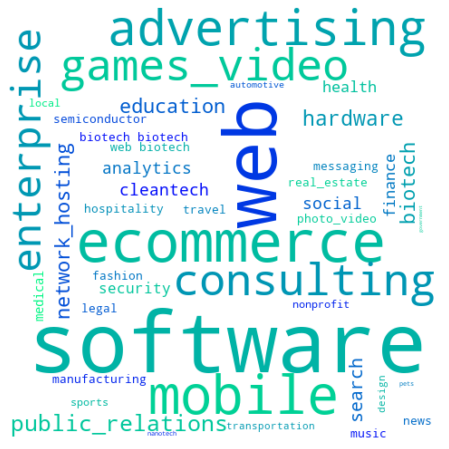

In [337]:
# Libraries
from wordcloud import WordCloud
plt.figure(figsize=(8,8))
# Create a list of word
text=" ".join(code for code in  df_company['category_code'])

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color='white',colormap='winter').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### Frequency of "Web","Softwater","E-Commerce","Mobile" is most in Category

#### Checking Frequency of Country Code

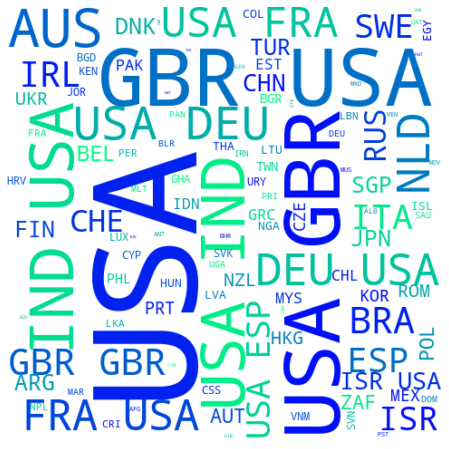

In [338]:
plt.figure(figsize=(8,8))

text=" ".join(code for code in  df_company['country_code'])

wordcloud = WordCloud(width=480, height=480, margin=0,background_color='white',colormap='winter').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### Most Frequent Values in Country Code are "USA","Britain","France","Israel"&"India"

2011    5194
2012    4804
2010    4401
2009    3788
2008    3257
        ... 
1931       1
1904       1
1909       1
1930       1
1902       1
Name: founded_at, Length: 113, dtype: int64


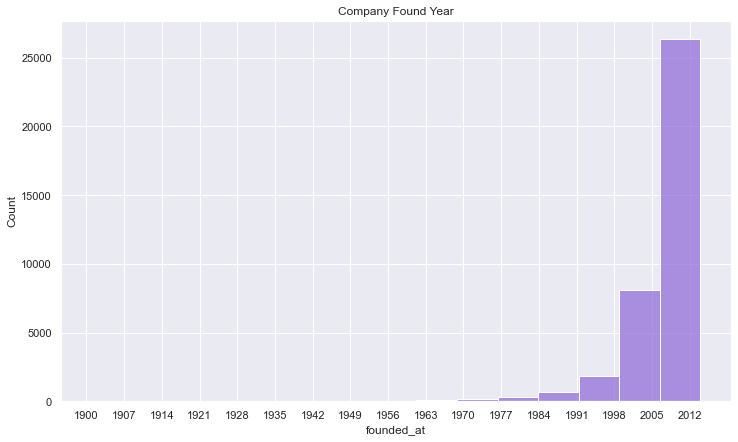

In [339]:
print(df_company['founded_at'].value_counts())
plt.title("Company Found Year")
sns.histplot(data=df_company,x=df_company['founded_at'],bins=15,color='mediumpurple')
plt.xticks(range(1900,2013,7));

##### Most Companies Foundes Between Year of 2008 to 2012 and in First Month 

In [340]:
# print(df_company['closed_at'].value_counts())
# plt.title("Company Found Year")
# sns.histplot(data=df_company,x=df_company['closed_at'],bins=40,color='peru')

<AxesSubplot:xlabel='milestones', ylabel='Density'>

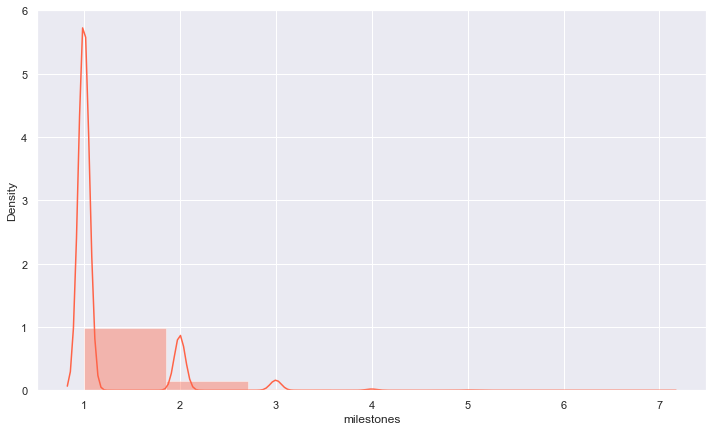

In [341]:
sns.distplot(a=df_company['milestones'],bins=7,color='tomato')

<AxesSubplot:xlabel='relationships', ylabel='Density'>

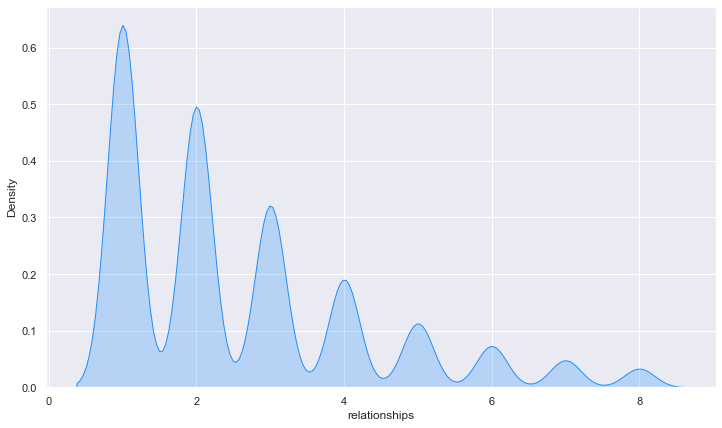

In [342]:
sns.kdeplot(df_company['relationships'],fill=True,color='dodgerblue')

##### Most Realationships Lies between 1 & 3

<AxesSubplot:xlabel='funding_rounds', ylabel='Count'>

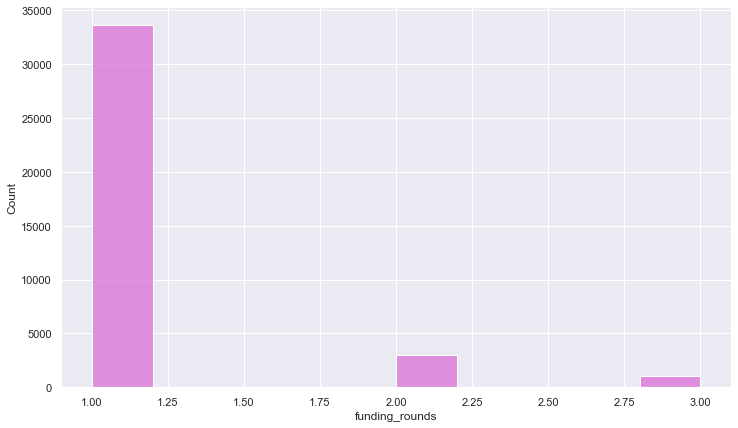

In [343]:
sns.histplot(df_company,x=df_company['funding_rounds'],bins=10,color='orchid')

In [344]:
# print(df_company['status'].value_counts())
# sns.countplot(x=df_company['status'],palette='inferno')

##### Most Comapies are at Status of Operating

In [345]:
a=df_company['category_code'].value_counts()[15:].reset_index()['index'].to_list()
df_company['category_code']=df_company['category_code'].replace(a,'other')

In [346]:
df_company['category_code'].unique()

array(['advertising', 'games_video', 'other', 'software', 'mobile',
       'network_hosting', 'consulting', 'enterprise', 'web', 'ecommerce',
       'public_relations', 'biotech', 'search', 'hardware', 'education'],
      dtype=object)

In [347]:
b=df_company['country_code'].value_counts()[10:].reset_index()['index'].to_list()
df_company['country_code']=df_company['country_code'].replace(b,'other')

In [348]:
df_company['country_code'].unique()

array(['other', 'USA', 'AUS', 'IND', 'FRA', 'ISR', 'GBR', 'NLD', 'DEU',
       'CAN', 'ESP'], dtype=object)

## Bivariate Analysis

##### Most Comapny Have Only One Funding Round

country_code
AUS      2.054942e+09
CAN      6.033556e+09
DEU      3.238181e+09
ESP      1.833799e+09
FRA      2.943474e+09
GBR      1.090185e+10
IND      5.869715e+09
ISR      1.935216e+09
NLD      1.540251e+09
USA      8.124218e+10
other    2.019195e+10
Name: funding_total_usd, dtype: float64


<AxesSubplot:xlabel='country_code'>

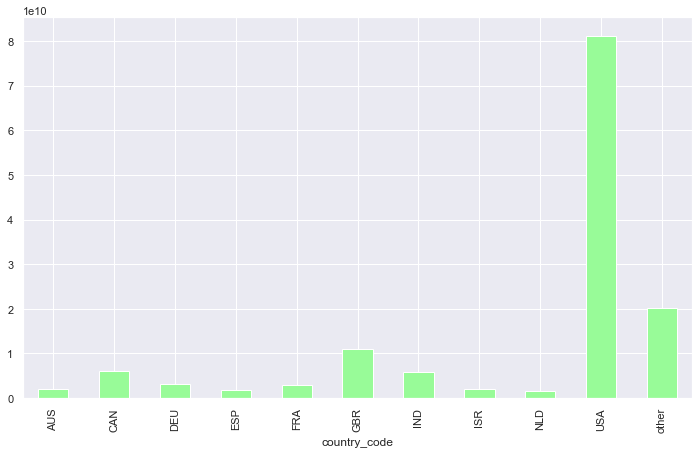

In [349]:
print(df_company.groupby('country_code')['funding_total_usd'].sum())
df_company.groupby('country_code')['funding_total_usd'].sum().plot(kind='bar',color='palegreen')

##### Highest funding is in USA then Great Britain and third is Canada

category_code
advertising         7.751911e+09
biotech             6.759417e+09
consulting          6.476442e+09
ecommerce           1.050555e+10
education           2.480659e+09
enterprise          6.029484e+09
games_video         6.428706e+09
hardware            3.450908e+09
mobile              8.633849e+09
network_hosting     2.928686e+09
other               2.872244e+10
public_relations    3.769855e+09
search              2.107007e+09
software            2.470745e+10
web                 1.703275e+10
Name: funding_total_usd, dtype: float64


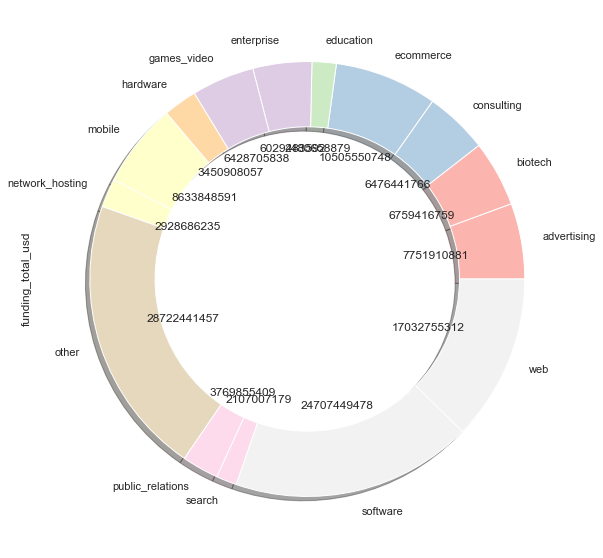

In [350]:
print(df_company.groupby('category_code')['funding_total_usd'].sum())
plt.figure(figsize=(10,10))
df_company.groupby('category_code')['funding_total_usd'].sum().plot(kind='pie',wedgeprops=dict(width=0.30),autopct=lambda p : '{:5.0f}'.format(p * (df_company['funding_total_usd'].sum()) / 100),shadow=True,cmap='Pastel1');

##### Highest funding is  for "Softwares" then "Web"

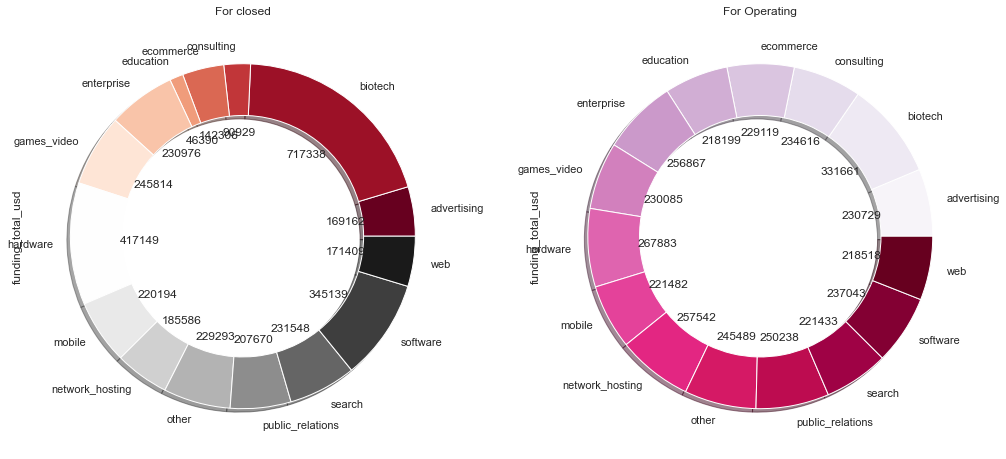

In [351]:
f,axes=plt.subplots(1,2,figsize=(17,8))
dfisclosed=df_company[df_company['isClosed']==0]
dfisclosed=dfisclosed.groupby('category_code')['funding_total_usd'].mean().plot(kind='pie',wedgeprops=dict(width=0.30),autopct=lambda p : '{:5.0f}'.format(p * (df_company['funding_total_usd'].mean()) / 100),shadow=True,cmap='RdGy',ax=axes[0],title='For closed');

dfisoperating=df_company[df_company['isClosed']==1]
dfisoperating=dfisoperating.groupby('category_code')['funding_total_usd'].mean().plot(kind='pie',wedgeprops=dict(width=0.30),autopct=lambda p : '{:5.0f}'.format(p * (df_company['funding_total_usd'].mean()) / 100),shadow=True,cmap='PuRd',ax=axes[1],title='For Operating');

For Closed Companies <b> Biotech, Hardware & Software </b> Companies has Highest Average funding<br>
For Operating Companies Highest Average  funding for <b>Biotech</b> following by <b>Advetising ,Consulting & Hardware</b>

In [352]:
# plt.figure(figsize=(18,6))
# dfcatfund=df_company.groupby(['country_code','status'])['funding_total_usd'].sum().nlargest(30)
# print(dfcatfund)
# dfcatfund=pd.DataFrame(dfcatfund).reset_index()
# sns.barplot(data=dfcatfund,x=dfcatfund['country_code'],y=dfcatfund['funding_total_usd'],hue=dfcatfund['status'],palette='cool')
# plt.legend(loc="upper center",bbox_to_anchor=(0.5,1), ncol=4)
# plt.xticks(rotation=90);

Data Skewed toward <b>USA</b> so Comapnies From <b>USA</b>  has Highest funding if They Closed or in Operating Status<br>

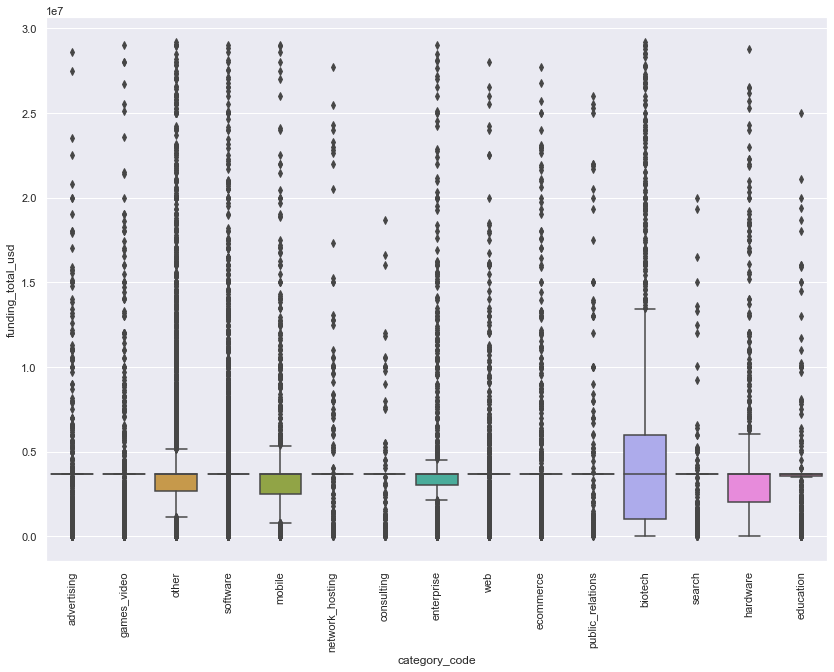

In [353]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df_company,x=df_company['category_code'],y=df_company['funding_total_usd'])
plt.xticks(rotation=90);

##### Graph Shows range of Funding for Different categories

<AxesSubplot:xlabel='milestones', ylabel='funding_total_usd'>

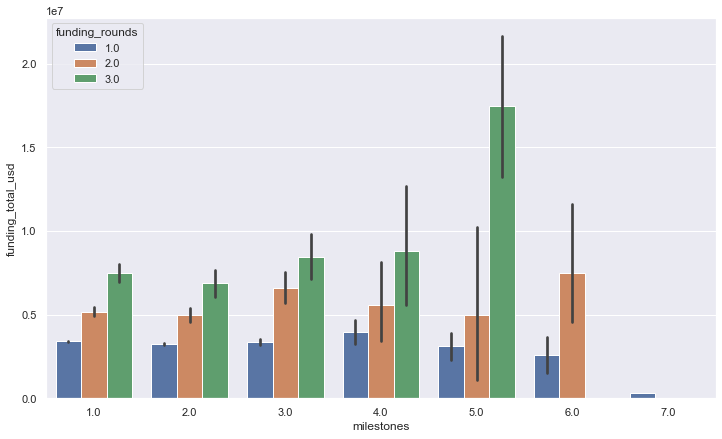

In [354]:
sns.barplot(x=df_company['milestones'],y=df_company['funding_total_usd'],hue=df_company['funding_rounds'])

##### Companies with 5 milestones  had Highet funding 

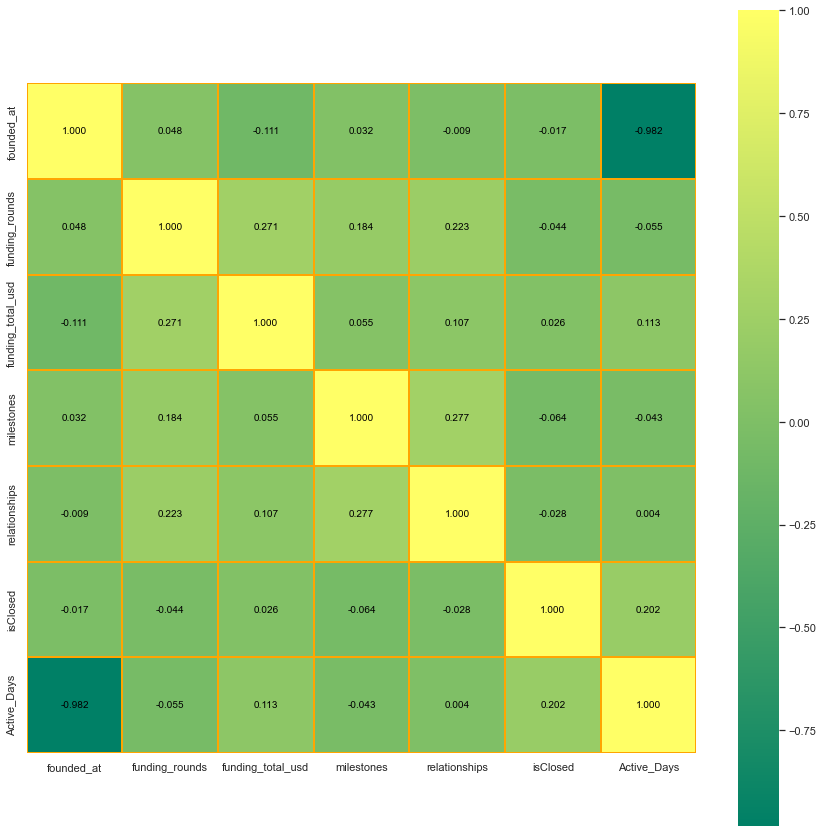

In [355]:
plt.figure(figsize=(15,15))
sns.heatmap(df_company.corr(),annot=True,cmap='summer',linewidths=2,linecolor='orange',
            annot_kws={'size':10,'color':'black'},fmt='.3f',square=True);

##### Graph Shows Correaltion between Each Columns

## Categorical Data Encoding

In [356]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder

In [357]:
df_company['category_code'].unique()

array(['advertising', 'games_video', 'other', 'software', 'mobile',
       'network_hosting', 'consulting', 'enterprise', 'web', 'ecommerce',
       'public_relations', 'biotech', 'search', 'hardware', 'education'],
      dtype=object)

In [358]:
a=(pd.DataFrame(df_company['category_code'].value_counts()[15:].reset_index())['index'].to_list())
catcode=df_company['category_code'].replace(a,'other')
catcode=pd.get_dummies(catcode,prefix='category_code')
catcode

,category_code_advertising,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37735,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37736,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
37737,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
37738,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [359]:
b=(pd.DataFrame(df_company['country_code'].value_counts()[10:].reset_index())['index'].to_list())
countrycode=df_company['country_code'].replace(b,'other')
countrycode=pd.get_dummies(countrycode,prefix='country_code')
countrycode

,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_USA,country_code_other
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
37735,0,0,0,0,0,0,0,0,1,0
37736,0,0,0,0,0,0,0,0,1,0
37737,0,0,0,0,0,0,0,0,1,0
37738,0,0,0,0,0,0,0,0,1,0


In [360]:
df_company=pd.concat([df_company,catcode,countrycode],axis=1)
df_company=df_company.drop(['category_code','country_code'],axis=1)
df_company

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,isClosed,Active_Days,category_code_advertising,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_USA,country_code_other
0,2007,1.0,3652913.0,1.0,2.0,1,5110.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2008,1.0,3652913.0,1.0,2.0,1,4745.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008,1.0,3652913.0,1.0,3.0,1,4745.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2003,3.0,10125293.0,1.0,6.0,1,6570.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2011,1.0,3652913.0,1.0,2.0,1,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37735,2006,2.0,1100000.0,2.0,4.0,0,2190.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37736,2008,1.0,3652913.0,1.0,5.0,1,4745.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37737,2007,1.0,3652913.0,2.0,5.0,1,5110.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37738,2008,1.0,3652913.0,1.0,1.0,1,4745.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [361]:
# df_company['']

In [362]:
df_company.dtypes

founded_at                          int64
funding_rounds                    float64
funding_total_usd                 float64
milestones                        float64
relationships                     float64
isClosed                            int32
Active_Days                       float64
category_code_advertising           uint8
category_code_biotech               uint8
category_code_consulting            uint8
category_code_ecommerce             uint8
category_code_education             uint8
category_code_enterprise            uint8
category_code_games_video           uint8
category_code_hardware              uint8
category_code_mobile                uint8
category_code_network_hosting       uint8
category_code_other                 uint8
category_code_public_relations      uint8
category_code_search                uint8
category_code_software              uint8
category_code_web                   uint8
country_code_AUS                    uint8
country_code_CAN                  

In [363]:
#no need of Status Column so We Can Drop it
# df_company=df_company.drop('status',axis=1)

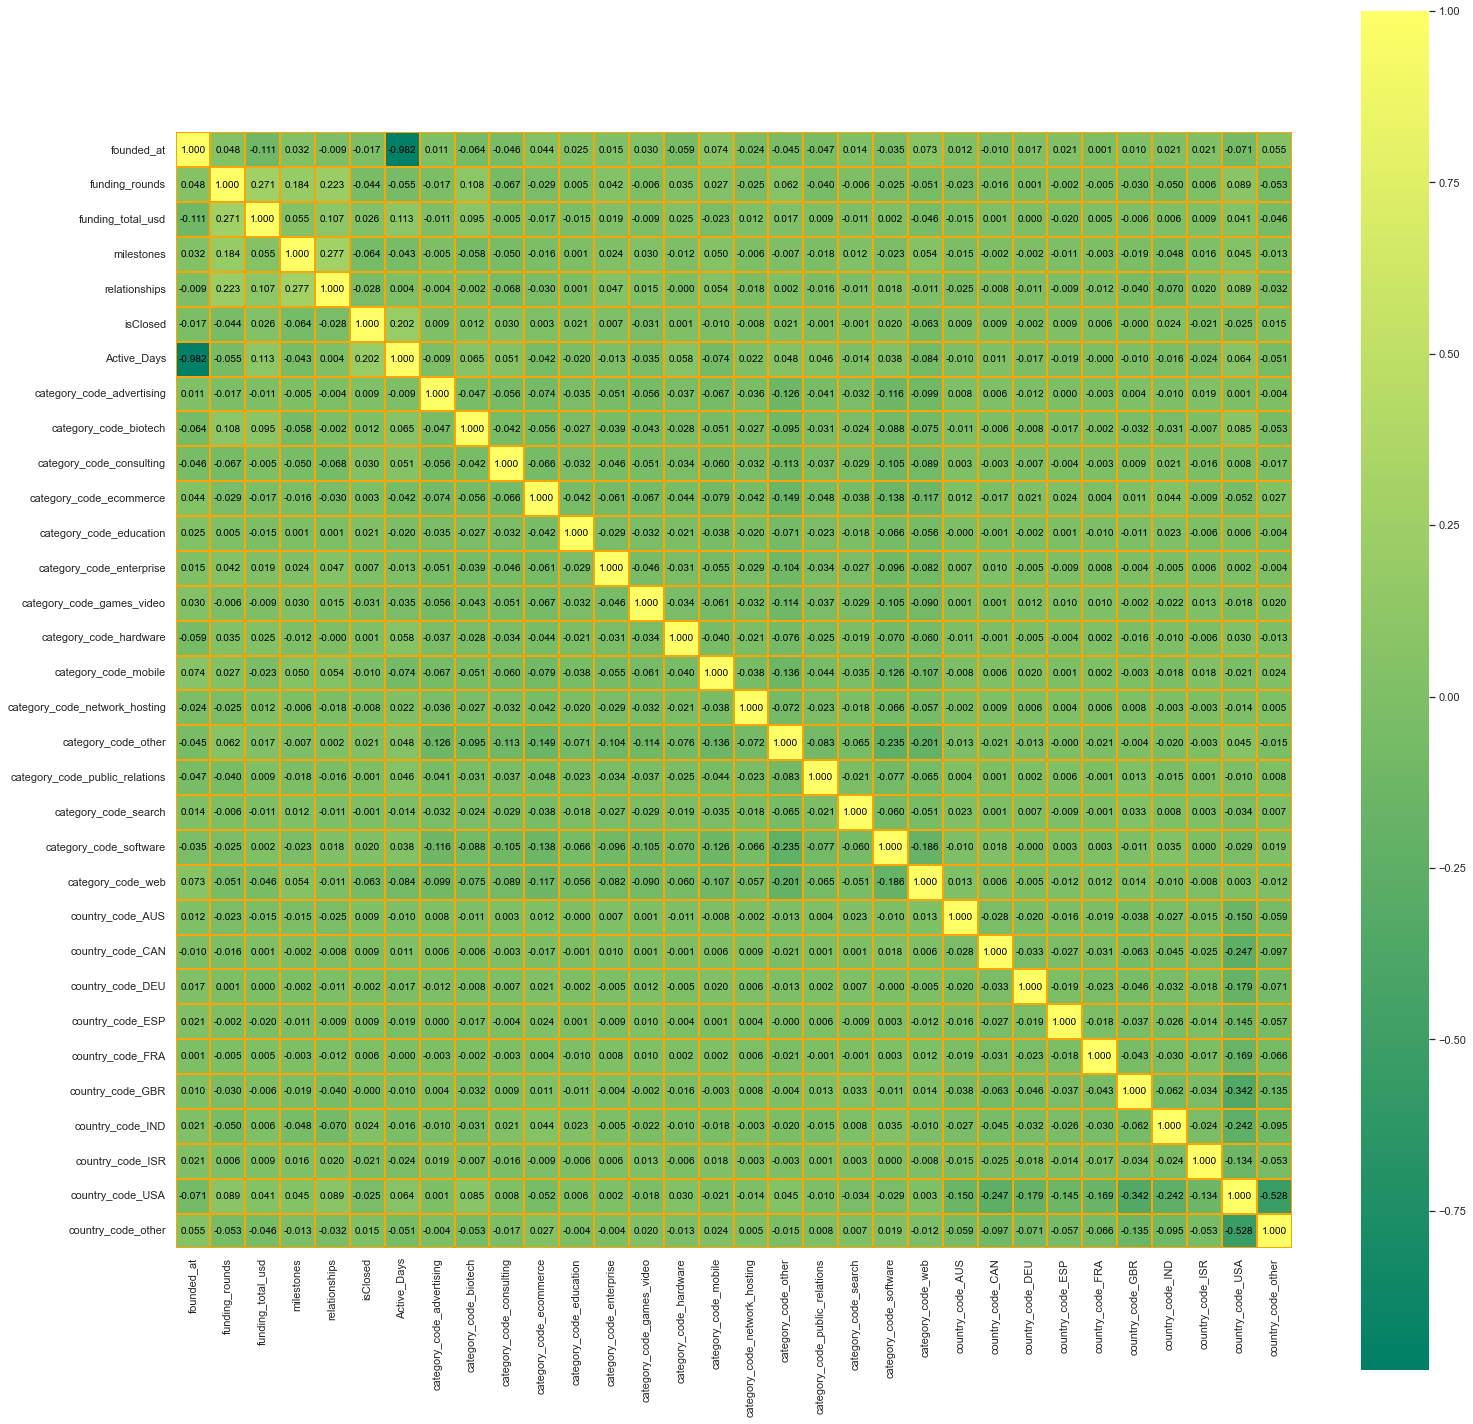

In [270]:
plt.figure(figsize=(25,25))
sns.heatmap(df_company.corr(),annot=True,cmap='summer',linewidths=2,linecolor='orange',
            annot_kws={'size':10,'color':'black'},fmt='.3f',square=True);

## Scaling of Data

In [364]:
from sklearn.preprocessing import StandardScaler

In [365]:
roscaler=StandardScaler()

In [366]:
# df_company[['funding_rounds','funding_total_usd','milestones','relationships','Active_Days']]=df_company[['funding_rounds','funding_total_usd','milestones','relationships','Active_Days']].astype('float64')

In [367]:
# df_company[['funding_rounds','funding_total_usd','milestones','relationships','Active_Days']]=roscaler.fit_transform(df_company[['funding_rounds','funding_total_usd','milestones'
#         ,'relationships','Active_Days']])

In [368]:
df_company.head()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,isClosed,Active_Days,category_code_advertising,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_USA,country_code_other
0,2007,1.0,3652913.0,1.0,2.0,1,5110.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2008,1.0,3652913.0,1.0,2.0,1,4745.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008,1.0,3652913.0,1.0,3.0,1,4745.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2003,3.0,10125293.0,1.0,6.0,1,6570.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2011,1.0,3652913.0,1.0,2.0,1,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [369]:
df_company.shape

(37740, 32)

In [370]:
features=df_company.drop('isClosed',axis=1)
target=df_company['isClosed']

### Normal Model

In [278]:
features.shape

(37740, 31)

In [279]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)


features_train,features_val,target_train,target_val=train_test_split(features_train,target_train,test_size=0.25,random_state=1)

#fitting Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(features_train,target_train)

predicted=model.predict(features_test)


print(f"Training  Accuracy : {model.score(features_train,target_train)}")
print(f"Testing Accuracy : {model.score(features_test,target_test)}")
print(f"Validation Accuracy : {model.score(features_val,target_val)}")

Training  Accuracy : 1.0
Testing Accuracy : 0.9985426603073662
Validation Accuracy : 0.9994700582935877


In [280]:
model.predict_proba(features_train)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99]])

In [281]:
import pickle
pickle.dump(model,open("Startup's Acquisition Status.pkl",'wb'))

### Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
smot=SMOTE(sampling_strategy='minority')
features_smot, target_smot = smot.fit_resample(features, target)

In [ ]:
target_smot.value_counts()

### Selcting Important Features

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(features_smot,target_smot)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=features.columns)

#Plotting Barchart for Impotant Features
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
important_features=pd.DataFrame(feat_importances.nlargest(15)).index
features_selected=features_smot[important_features]

#Closed at is very relevnt but  giving same information as target so we can drop it
features_selected.drop('closed_at',axis=1,inplace=True)

In [ ]:
#Spliting data for Trainig & testing
from sklearn.metrics import classification_report,confusion_matrix
features_train,features_test,target_train,target_test=train_test_split(features_selected,target_smot,test_size=0.2,random_state=1)

features_train,features_val,target_train,target_val=train_test_split(features_train,target_train,test_size=0.25,random_state=1)


#Fitting on model
model=RandomForestClassifier(random_state=0)
model.fit(features_train,target_train)
predicted=model.predict(features_test)


print(f"Training Accuracy :{model.score(features_train,target_train)}")
print(f"Testing Accuracy :{model.score(features_test,target_test)}")
print(f"Validation Accuracy :{model.score(features_val,target_val)}\n\n")
print(classification_report(target_test,predicted))

sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## HyperParameter Tuning

In [ ]:
rf=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_state=[x for x in range(1,51)]
n_estimators = [x for x in range(100,1201,100)]
max_features = ['auto', 'sqrt']
max_depth = [x for x in range(5,31,5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state':random_state
              }

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error')

In [ ]:
rf_random.fit(features_train,target_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_new=RandomForestClassifier(n_estimators=1100,random_state=17,min_samples_split=10,
                              min_samples_leaf=5,max_features='auto',max_depth=25)

In [ ]:
rf_new.fit(features_train,target_train)

In [ ]:
predicted=rf_new.predict(features_test)

print(f"Training Accuracy :{model.score(features_train,target_train)}")
print(f"Testing Accuracy :{model.score(features_test,target_test)}")
print(f"Validation Accuracy :{model.score(features_val,target_val)}\n\n")
print(classification_report(target_test,predicted))

sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Cross Validation Score

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
models=[('Random Forest',RandomForestClassifier())]

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,features_selected,target_smot,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

In [ ]:
import pickle
pickle.dump(rf_new,open("Startup's Acquisition Status.pkl",'wb'))